### Introduction to Deep Learning
- Deep Learning (DL) is a ML technique that uses deep neural networks (DNN's) as models.

- A deep neural network is a model inspired by animal brains. It's composed of interconnected nodes (or neurons) arranged in layers which process a signal (a real number) and send it to other node layers, until the signal reaches an output layer and the final result can be obtained.

- Depending on the structure of the connections and the nature of the operations, DNN's can be classified into many subtypes (multilayer perceptrons, convolutional neural networks, recursive neural networks, etc).

- So far, we've only seen techniques that deal with tabular data; data which fits neatly into tables. But not all data can fit into tables, and not all techniques with good results for tabular data can be used on non-tabular data. This is where DL comes in.

- DL can be used for both regression and classification problems that deal with non-tabular data such as images, video, audio,etc. DNN's have been proven to be very reliable models that have pushed the ML field forward, but they're very complex and hard to train.

#### Fashion Classification
- We'll shift our focus to image data for a multi-class classification project, leveraging neural networks. Specifically, we will build a fashion classification service that allows users to upload an image and receive its category in return (e.g., T-shirts). 

- The dataset we'll use is a subset of the clothing dataset, featuring its 10 most popular classes.
- The training dataset is organized into 10 folders, each named after a category and containing the corresponding images. Since the dataset has already been split, no need to perform train-test-validation splits.

#### TensorFlow and Keras
- Introduction
- TensorFlow is a library for ML and AI. Keras is a library that provides a Python interface for TensorFlow, making it simpler to use. Keras used to be an independent library but has been absorved into TensorFlow.

- Installing TensorFlow: Use 'pip intall tensorflow' in the powershell
- Loading Image

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### Tensorflow and Keras related Liberaries

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img


#### Loading any image from the Trained folder of the Cloned Dataset

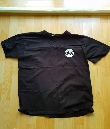

In [30]:

path = r"C:\Users\g\Machine-Learning-1st-Assigmnment\clothing-dataset-small\train\t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname = fr"{path}\{name}"

img = load_img(fullname, target_size=(129, 110))
img

When loading an image with load_img(), the resulting object is a PIL image. PIL stands for Python Image Library; PIL used to be a library but it was abandoned and nowadays the Pillow library is used instead, but the image format is the same.

A PIL image object is essentially an array. In the case of color images, a PIL image will have 3 channels, one for each RGB color. A channel is a matrix where each component represents a pixel, and its value ranges from 0 to 255 (1 byte). Thus, a pixel is composed of 3 different values, one for each elemental color, and these values are found in the same position in the 3 matrices.

Neural networks that deal with images expect the images to all have the same size. target_size inside load_img() allows us to define a final size in pixels for the converted image, as in load_img(target_size=(299, 299)).

The final size of the PIL image can be calculated as (h, w, c), where h is the height of the image, w is the width and c is the number of channels in the image.

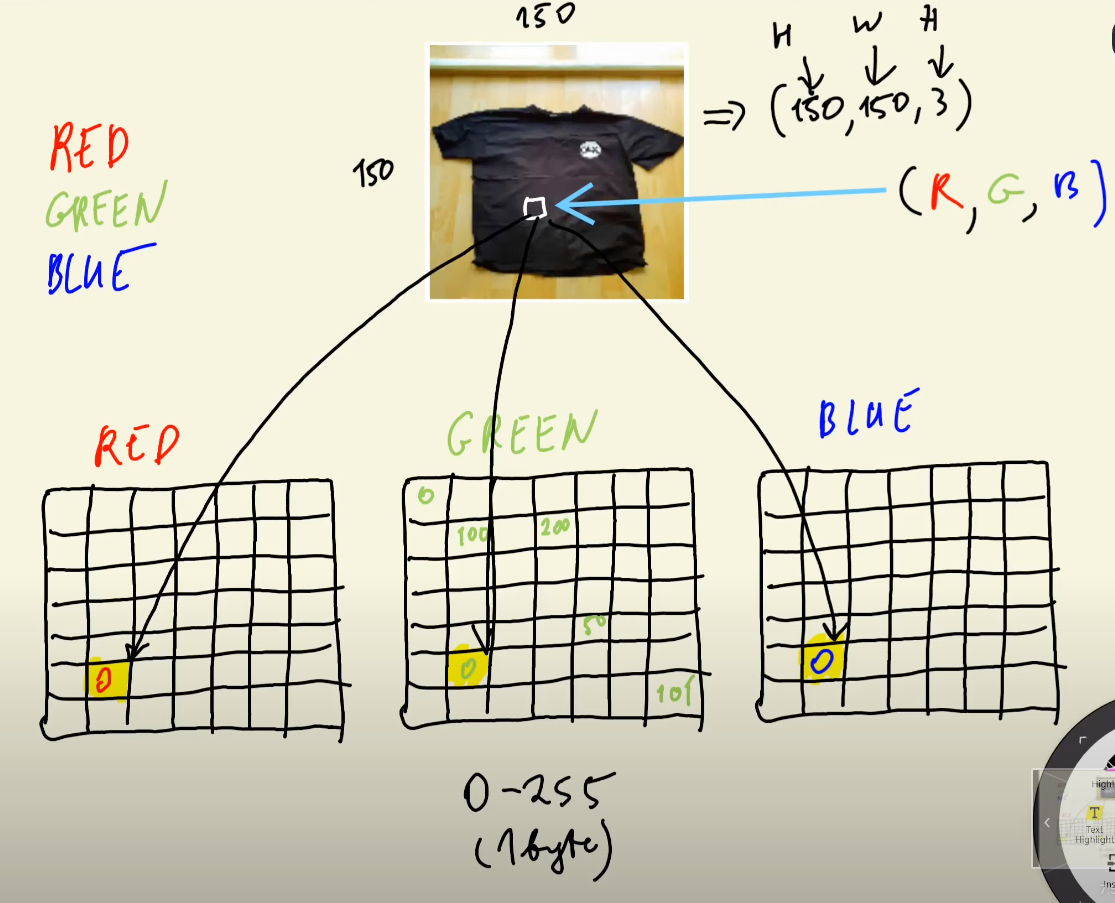

In [33]:
# PIL images can easily be converted to NumPy arrays of dtype=uint8 (unsigned integers of size 8 bits):

x = np.array(img)
x

array([[[188, 179, 110],
        [185, 176, 107],
        [186, 177, 108],
        ...,
        [251, 251, 251],
        [251, 252, 247],
        [251, 252, 246]],

       [[204, 194, 133],
        [206, 196, 135],
        [202, 192, 131],
        ...,
        [252, 251, 249],
        [250, 249, 244],
        [250, 250, 242]],

       [[201, 190, 134],
        [204, 193, 137],
        [204, 193, 137],
        ...,
        [253, 250, 245],
        [252, 249, 242],
        [251, 248, 239]],

       ...,

       [[171, 157,  82],
        [171, 157,  82],
        [170, 156,  81],
        ...,
        [181, 139,  29],
        [185, 141,  32],
        [183, 136,  28]],

       [[171, 157,  82],
        [171, 157,  82],
        [172, 158,  83],
        ...,
        [180, 138,  28],
        [187, 143,  34],
        [181, 134,  26]],

       [[170, 156,  81],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [180, 137,  24],
        [186, 140,  28],
        [181, 133,  22]]

#### Pre-trained convolutional neural networks
Instead of training a DNN from scratch, we can use a pre-trained network in order to speed up work. There are many pre-trained networks available online.

The standard training dataset for general image classification is ImageNet, a dataset with over a million images in 1000 different categories.

For this example we will use a Xception network pre-trained on ImageNet.

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/


In [35]:
from tensorflow.keras.applications.xception import xception

ImportError: cannot import name 'xception' from 'tensorflow.keras.applications.xception' (c:\Users\g\Machine-Learning-1st-Assigmnment\MLPractice\Lib\site-packages\keras\_tf_keras\keras\applications\xception\__init__.py)